In [30]:
#importer les packages nécessaires
import numpy as np 
import pandas as pd
#impoter les packages de visualitions 
import matplotlib.pyplot as plt 
import seaborn as sns 
#importer les packages de préparations de donnees  
from sklearn.preprocessing import StandardScaler
#impoter les packages de clustering
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA




In [ ]:
#importer les donnees
df = pd.read_csv('dataset-90380.csv')
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [12]:
scaler = StandardScaler()#mettre les donner entre [-1 , 1 ]
x_scaled = scaler.fit_transform(df)
x_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [13]:
wss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i , init='k-means++')
    kmeans.fit(x_scaled)
    wss.append(kmeans.inertia_)


In [14]:
wss

[200.0,
 104.96163315756871,
 80.40667454020314,
 58.80592576211882,
 52.58981857701066,
 45.48795935889535,
 41.758736406884815,
 36.087432977593004,
 31.331371290009606,
 32.47740567840711]

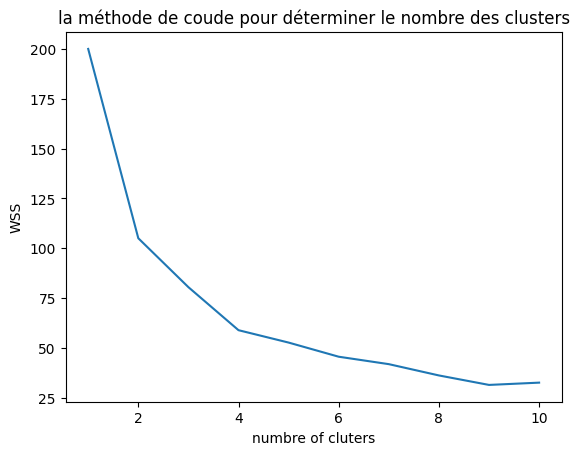

In [16]:
plt.plot(range(1,11), wss)
plt.title('la méthode de coude pour déterminer le nombre des clusters')
plt.xlabel('numbre of cluters')
plt.ylabel('WSS')
plt.show()

In [17]:
kmeans_etats = KMeans(n_clusters= 4 , init='k-means++' )
kmeans_etats.fit(x_scaled)

KMeans(n_clusters=4)

In [31]:
clusters = kmeans_etats.predict(x_scaled)
df['clusters'] = clusters
df

,Murder,Assault,UrbanPop,Rape,clusters
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,3
Arizona,8.1,294,80,31.0,3
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,3
Colorado,7.9,204,78,38.7,3
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,3
Georgia,17.4,211,60,25.8,1


In [32]:
df_clusters = df.groupby(['clusters']).mean().round(0)
df_clusters

,Murder,Assault,UrbanPop,Rape
clusters,,,,
0,6.0,139.0,74.0,19.0
1,14.0,244.0,54.0,21.0
2,4.0,79.0,52.0,12.0
3,11.0,257.0,76.0,33.0


In [33]:
for i in range(4): 
    print(f'end=Cluster {i}')
    print(df[df.clusters == i].index.tolist())
    print()

end=Cluster 0
['Connecticut', 'Delaware', 'Hawaii', 'Indiana', 'Kansas', 'Massachusetts', 'New Jersey', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Utah', 'Virginia', 'Washington', 'Wyoming']

end=Cluster 1
['Alabama', 'Arkansas', 'Georgia', 'Louisiana', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee']

end=Cluster 2
['Idaho', 'Iowa', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'South Dakota', 'Vermont', 'West Virginia', 'Wisconsin']

end=Cluster 3
['Alaska', 'Arizona', 'California', 'Colorado', 'Florida', 'Illinois', 'Maryland', 'Michigan', 'Missouri', 'Nevada', 'New Mexico', 'New York', 'Texas']



In [34]:
# fonction pour afficher les composantes principales
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

Nombre de composantes calculées :  4


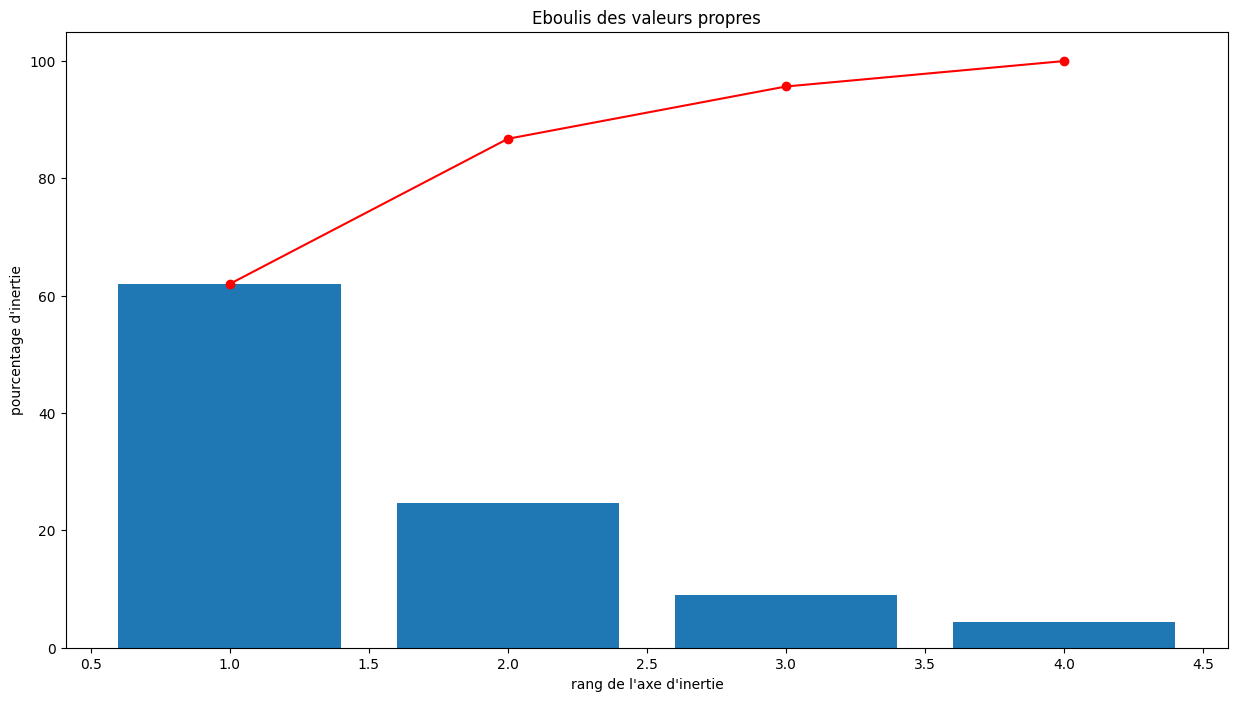

In [35]:

# choix du nombre de composantes à calculer vu qu'on a trois parametres
n_comp = 4

# Calcul des composantes principales
pca = PCA(n_components=n_comp)
pca.fit(x_scaled)
print('Nombre de composantes calculées : ', pca.n_components_)

# Eboulis des valeurs propres
plt.figure( figsize = ( 15, 8)) 
display_scree_plot(pca)

In [41]:
#appliquer l'acp pour avoir 2 composants du moment que 2 composants nous permettent d'avoir 87 de l'information
pca = PCA(n_components=2).fit(x_scaled)
Xk_projected = pca.transform(x_scaled)

<Axes: xlabel='Composante 1', ylabel='Composante 2'>

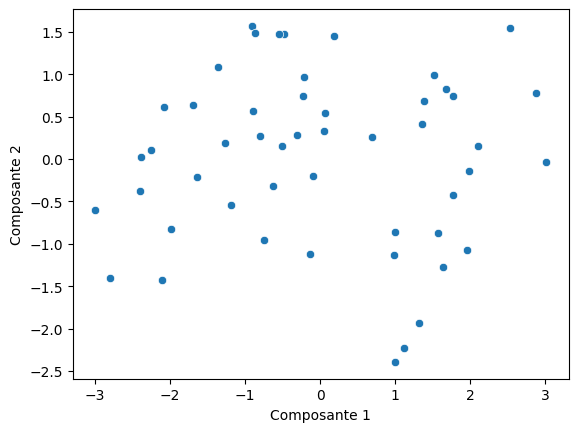

In [ ]:

# Appliquer l'ACP avec 2 composantes principales
pca = PCA(n_components=2).fit(x_scaled)
Xk_projected = pca.transform(x_scaled)

# Convertir en DataFrame pour faciliter l'affichage
Xk_projected_df = pd.DataFrame(Xk_projected, columns=['Composante 1', 'Composante 2'])

# Visualiser les projections
sns.scatterplot(data=Xk_projected_df, x='Composante 1', y='Composante 2', alpha=1)


In [38]:
#cette fonction dessine le cercle de correlation (vous pouvez l'avoir facilement sur google)
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

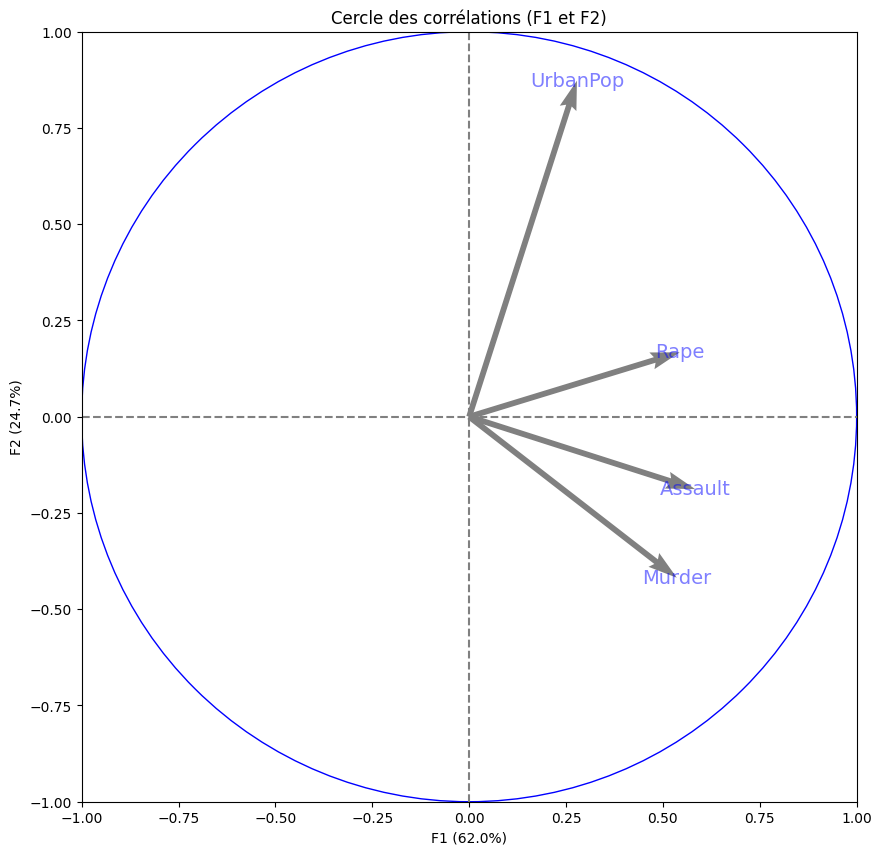

In [39]:

#utiliser la fonction display_circles() pour dessiner le cercle de correlation des deux composantes
index = df.index 
features = df.columns
choix_n_comp=2
pcs = pca.components_
display_circles(pcs, choix_n_comp, pca, [(0,1)], labels = np.array(features))

# Analyse du Cercle de Corrélation issu de l'Analyse en Composantes Principales (ACP)

## Interprétation du cercle de corrélation

### Position des flèches
Chaque flèche représente une variable (UrbanPop, Rape, Assault, Murder) dans l’espace des deux premières composantes principales (F1 et F2). La longueur et la direction de chaque flèche indiquent la contribution de la variable à ces deux composantes.

### Longueur des flèches
- Plus une flèche est longue et proche du cercle, plus la variable est bien représentée par les deux premières composantes.
- Si une flèche atteint presque le bord du cercle, cela signifie que la variable est fortement corrélée avec la combinaison linéaire associée à ces composantes principales.
- Dans cet exemple, les variables comme UrbanPop et Murder ont des flèches relativement longues, ce qui suggère qu'elles contribuent fortement aux deux premières composantes.

### Orientation des flèches et relations entre variables
- Des flèches proches l'une de l'autre, comme celles de Assault et Murder, suggèrent que ces variables sont corrélées positivement dans le nouvel espace.
- Si deux flèches étaient opposées (ce qui n'est pas le cas ici), cela indiquerait une corrélation négative entre les variables dans cet espace.
- Des angles proches de 90° entre des flèches, comme entre UrbanPop et Murder, suggèrent une faible corrélation ou une indépendance entre ces variables.

## Interprétation des composantes principales
Les deux composantes principales F1 et F2 capturent la variance des données. La position des variables par rapport à ces composantes peut être interprétée pour comprendre les dimensions sous-jacentes :
- Par exemple, si Murder, Assault, et Rape sont proches les uns des autres, cela peut indiquer qu'ils sont liés à une dimension commune, comme une mesure de violence ou de criminalité.
- UrbanPop, orienté dans une direction différente, pourrait indiquer une autre dimension, comme l’urbanisation.


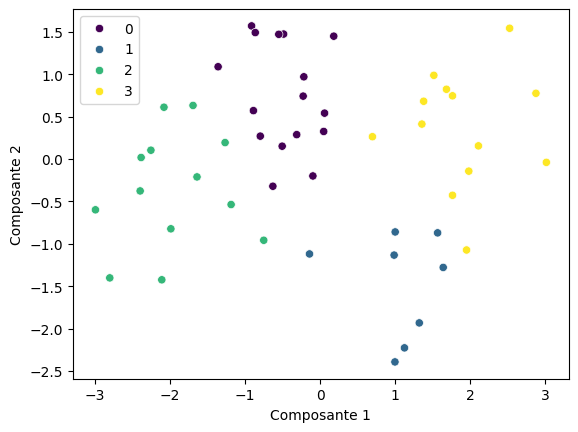

In [47]:


# Conversion de Xk_projected en DataFrame
Xk_projected_df = pd.DataFrame(Xk_projected, columns=['Composante 1', 'Composante 2'])
Xk_projected_df['Cluster'] = clusters  # Ajout de la colonne clusters

# Création du scatter plot
sns.scatterplot(data=Xk_projected_df, x='Composante 1', y='Composante 2', palette='viridis', hue='Cluster', alpha=1)

# Affichage de la légende et du graphique
plt.legend()
plt.show()
